# Test set evaluation on deterministic models

The purpose of this experiment is to measure how the **validation accuracy** changes accross a single model trained with different values of **alpha**.

In [1]:
import sys
sys.path.append('..')

from utils.plotting import *

%matplotlib inline

## 1. Compare each each set of experiments

In order to have a sense of how good these models actually are, we'll load the baseline.

In [2]:
baseline_loc = '../results/cifar10/seeker/default/baseline.txt'
with open(baseline_loc) as f:
    baseline = float(f.read())
print('Baseline accuracy: {:.2f}%'.format(baseline * 100))

Baseline accuracy: 65.37%


### a) Training completely from scratch (i.e. full training)

In [3]:
result_dir = '../results/cifar10/hns/deterministic/full_training_10/'
full_training = read_results(result_dir)

Text(0.5, 1.0, 'Full training')

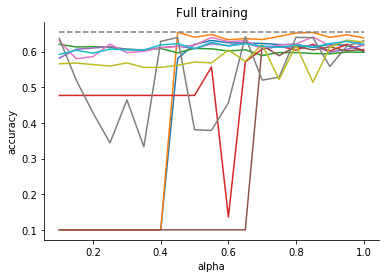

In [4]:
plot_all_results(full_training, baseline=baseline)
plt.title('Full training')

Text(0.5, 1.0, 'Full training')

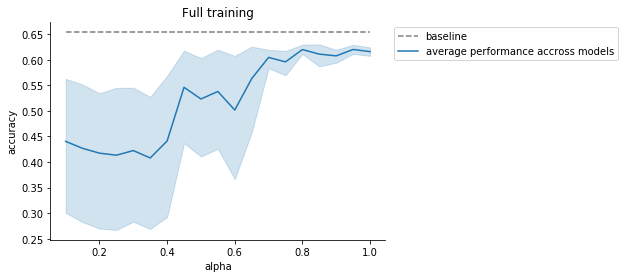

In [5]:
plot_average_results(full_training, baseline=baseline)
plt.title('Full training')

In these 10 runs we witnessed a high degree of *instability* in the models. Some manage to maintain adequate performance ($\approx 60\%$) for all values of alpha, but a few models experience fluctuations, especially in lower values of alpha.

### b) Pretrained hider

In [6]:
result_dir = '../results/cifar10/hns/deterministic/pretrained_hider_10/'
pretrained_hider = read_results(result_dir)

Error in file: ../results/cifar10/hns/deterministic/pretrained_hider_10/2/results.pkl


Text(0.5, 1.0, 'Pretrained hider')

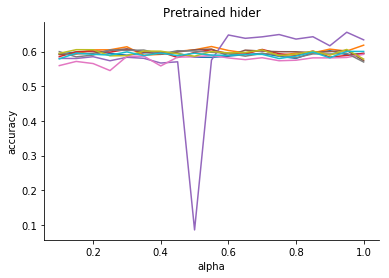

In [7]:
plot_all_results(pretrained_hider)
plt.title('Pretrained hider')

Text(0.5, 1.0, 'Pretrained hider')

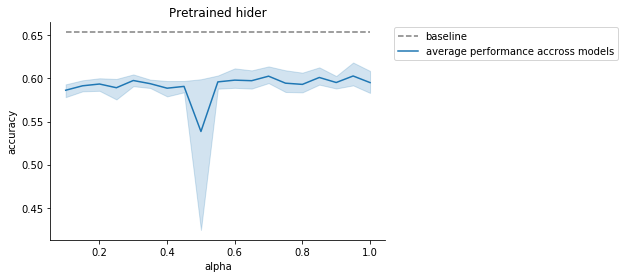

In [8]:
plot_average_results(pretrained_hider, baseline=baseline)
plt.title('Pretrained hider')

These models are a lot more stable, and maintain a high performance, through all values of alpha.

### c) Pretrained seeker

In [9]:
result_dir = '../results/cifar10/hns/deterministic/pretrained_seeker_10/'
pretrained_seeker = read_results(result_dir)

Text(0.5, 1.0, 'Pretrained seeker')

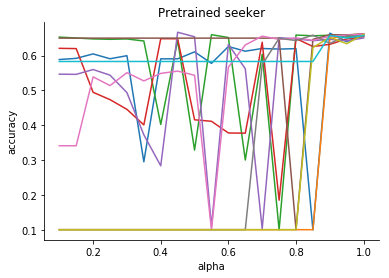

In [10]:
plot_all_results(pretrained_seeker)
plt.title('Pretrained seeker')

Text(0.5, 1.0, 'Pretrained seeker')

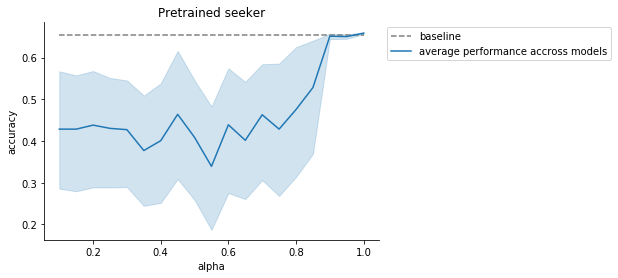

In [11]:
plot_average_results(pretrained_seeker, baseline=baseline)
plt.title('Pretrained seeker')

The pretrained seeker seemed to not have helped a lot. There are a few models that experience fluctuations through the different values of alpha.

### d) Pretrained hider and seeker

In [12]:
result_dir = '../results/cifar10/hns/deterministic/pretrained_both_10/'
pretrained_both = read_results(result_dir)

Text(0.5, 1.0, 'Pretrained both hider and seeker')

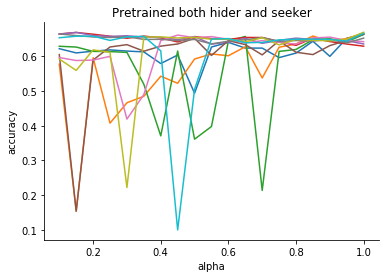

In [13]:
plot_all_results(pretrained_both)
plt.title('Pretrained both hider and seeker')

Text(0.5, 1.0, 'Pretrained both hider and seeker')

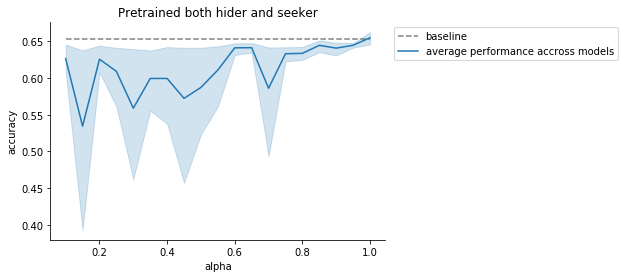

In [14]:
plot_average_results(pretrained_both, baseline=baseline)
plt.title('Pretrained both hider and seeker')

These models show a higher degree of stability due to their pretrained hider, however not enough to justify pretraining both the hider and seeker components of the network.

## 2. Comparative

### a) mean comparison

we'll first compare the **mean** of all 10 experiments run for each setting.

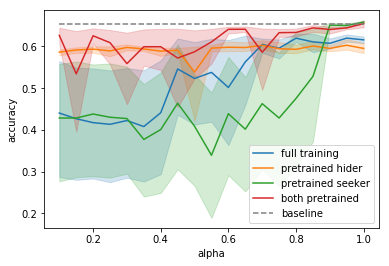

In [15]:
sns.lineplot(x='alpha', y='accuracy', data=full_training, label='full training')
sns.lineplot(x='alpha', y='accuracy', data=pretrained_hider, label='pretrained hider')
sns.lineplot(x='alpha', y='accuracy', data=pretrained_seeker, label='pretrained seeker')
sns.lineplot(x='alpha', y='accuracy', data=pretrained_both, label='both pretrained')

plt.plot(alphas, [baseline] * 19, label='baseline', c='0.5', ls='--')

plt.legend(loc='lower right')

From the figure above, we can clearly see that the pretrained hider components **clearly help** the stability of the models. The pretrained seeker can push the model to higher accuracies, but it also adds a degree of **instability** to the process. Using both, pushed some models to near-baseline performance, however it caused 3-4 models to fluctuate heavily.

### b) best comparison

Now, we'll compare the **best** out of all 10 models for each setting.

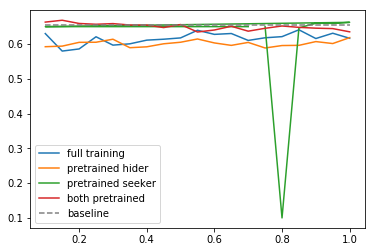

In [16]:
best_full_idx = full_training.groupby('experiment')['accuracy'].sum().idxmax()
best_hider_idx = pretrained_hider.groupby('experiment')['accuracy'].sum().idxmax()
best_seeker_idx = pretrained_seeker.groupby('experiment')['accuracy'].sum().idxmax()
best_both_idx = pretrained_both.groupby('experiment')['accuracy'].sum().idxmax()

best_full = full_training[full_training['experiment'] == best_full_idx]
best_hider = pretrained_hider[pretrained_hider['experiment'] == best_hider_idx]
best_seeker = pretrained_seeker[pretrained_seeker['experiment'] == best_seeker_idx]
best_both = pretrained_both[pretrained_both['experiment'] == best_both_idx]

plt.plot(best_full['alpha'], best_full['accuracy'], label='full training')
plt.plot(best_hider['alpha'], best_hider['accuracy'], label='pretrained hider')
plt.plot(best_seeker['alpha'], best_seeker['accuracy'], label='pretrained seeker')
plt.plot(best_both['alpha'], best_both['accuracy'], label='both pretrained')

plt.plot(alphas, [baseline] * 19, label='baseline', c='0.5', ls='--')

plt.legend()

The above graph is interesting because it proves that even though the pretrained seeker adds instability to the models, only through it can the models achieve a baseline-level performance.

## Discussion

### Definitions

- There are two factors that come into play: **performance** (i.e. how high the accuracy was for a certain model) and **variance** (i.e. if we repeat the experiment how likely are we to expect the same performance.)
- There are two types of variance we observed here. Variance of a single model for different values of alpha and the variance for training the same model more than once. When we use the term *variance* we'll refer to **both** types.
- We want a model to have **high performance** (i.e. high accuracy) and **low variance** (i.e. few fluctuations in performance).
- The performance of a trained seeker, on its own, will be referred to as the **baseline** performance. Obviously, because we are hiding information, the models aren't able to surpass this performance. It will serve as the upper limit for our experiments.
- There are two extreme states that the model can get *locked* into, which provide suboptimal solutions:

    - The model doesn't hide anything, but classifies correctly.
    - The model hides everything, but classifies randomly.

    These states will be referred to as **collapses**.

### Observations

- Adding a pretrained hider **didn't** affect performance but **lowered** the model's variance significantly.
- Adding a seeker **increased** the model's variance significantly, which led to some models with **better** performance.
- Even though these two effects are somewhat adversarial, adding both a pretrained hider and seeker brought the good out of both worlds, as it both **improved** performance and **lowered** the variance (Note: it did not lower it though as much as a pretrained hider on its own did). 

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:black;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-wp8o{border-color:#000000;text-align:center;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
</style>
<table class="tg">
  <tr>
    <th class="tg-0lax" colspan="4">Observations for different training settings</th>
  </tr>
  <tr>
    <td class="tg-c3ow" colspan="2" rowspan="2"></td>
    <td class="tg-7btt" colspan="2">pretrained hider</td>
  </tr>
  <tr>
    <td class="tg-7btt">no</td>
    <td class="tg-7btt">yes</td>
  </tr>
  <tr>
    <td class="tg-7btt" rowspan="2">pretrained<br>seeker</td>
    <td class="tg-7btt">no</td>
    <td class="tg-wp8o">medium variance<br>medium peak performance</td>
    <td class="tg-wp8o">low variance<br>medium peak performance<br></td>
  </tr>
  <tr>
    <td class="tg-7btt">yes</td>
    <td class="tg-wp8o">high variance<br>high peak performance</td>
    <td class="tg-wp8o">low/medium variance<br>high peak performance<br></td>
  </tr>
</table>

### Interpretations

When training the network completely from scratch, both hider and seeker components are *unsure* on what to do to be effective. They need to find a way to *work together* in order to achieve a low error. There is a high risk of a collapse at this stage and is entirely the fault of the hider. This risk is what causes the variance, as some models might collapse and some might be trained effectively. 

By pretraining the hider, it stats with a basic knowledge of the dataset, which reduces the risk of it collapsing and thus reduces the total variance of the model. This, however, impairs the performance of the model.

On the other hand, by pretraining the seeker, the model is even more prone to collapsing. A trained seeker is much less adaptable and when the hider tries to hide even a few pixels it increases its classification loss. This dissuades the hider from hiding anything which leads to the collapse. However, by default, the pretrained seeker achieves a baseline-level performance.

### Conclusions

- **No pretraining is necessary**. The vanilla model's performance and variance is by all means acceptable.
- Pretraining the **hider**, on its own, helps and is **recommended**.
- Pretraining the **seeker**, on its own, can increases variance and is **not recommended**.
- Pretraining **both** components, also helps and, if possible, is also **recommended**.